In [4]:
import torch
import torchviz
import matplotlib.pyplot as plt

In [5]:
cuda=torch.device('cuda:0')

In [6]:
print(torch.cuda.is_available())  # Renvoie True si un GPU compatible CUDA est disponible

True


In [7]:
print(torch.cuda.get_device_capability(device=cuda))

(8, 6)


In [8]:
a=torch.tensor([11,11],device=cuda)

In [9]:
#print(a+a)

In [10]:
def f(x,theta):
    return x + theta

In [11]:
def LT(mb, T, theta):
    x = torch.distributions.MultivariateNormal(loc=torch.tensor([1.0]),covariance_matrix=torch.tensor([[1.0]])).sample((mb,))
    for _ in range(T):
        x = f(x,theta)
    return torch.square(x - torch.tensor([1])).mean()

In [25]:
mb = 1024
T = 3
theta = torch.tensor([1.0])

In [26]:
LT(mb, T, theta)

tensor(9.8844)

In [27]:
def derivative_LT(T, theta):
    return 2*(T**2)*theta

In [28]:
nb_epochs = 100
ind_epoch = 1
step = 0.0001
theta = torch.tensor([1.0])
liste_LT = []

while ind_epoch <= nb_epochs:
    gradient_reel = derivative_LT(T, theta)
    theta = theta - step*gradient_reel
    liste_LT.append(LT(mb, T, theta))
    ind_epoch += 1

RuntimeError: Numpy is not available

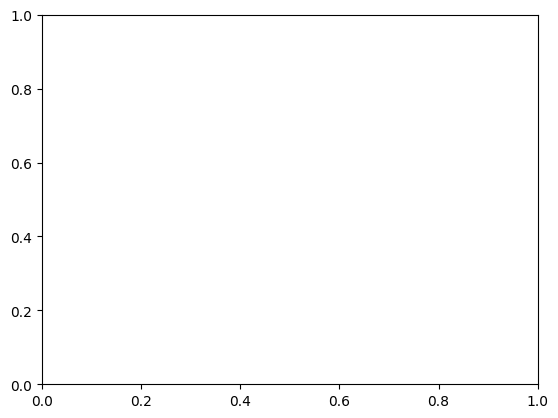

In [29]:
plt.plot(liste_LT)
plt.show()

In [30]:
liste_LT[-1]

tensor(7.1344)

In [31]:
theta

tensor([0.8351])

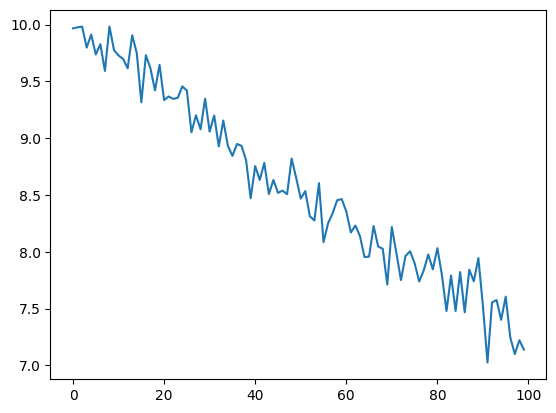

In [32]:
# version avec torch.optim.SGD
nb_epochs = 100
ind_epoch = 1
step = 0.0001
theta = torch.tensor([1.0],requires_grad=True)
liste_LT = []
optimizer = torch.optim.SGD([theta],lr=step)

while ind_epoch <= nb_epochs:
    optimizer.zero_grad()
    loss = LT(mb, T, theta)
    loss.backward()
    optimizer.step()
    liste_LT.append(loss.item())
    ind_epoch += 1

plt.plot(liste_LT)
plt.show()

In [33]:
liste_LT[-1]

7.139616012573242

In [34]:
theta

tensor([0.8350], requires_grad=True)

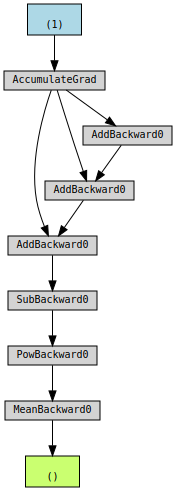

In [35]:
T = 3
torchviz.make_dot(loss)